In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [34]:
df=pd.read_csv('train.csv')[['Age','Pclass','Fare','Survived']]
df.head()

,Age,Pclass,Fare,Survived
0,22.0,3,7.2500,0
1,38.0,1,71.2833,1
2,26.0,3,7.9250,1
3,35.0,1,53.1000,1
4,35.0,3,8.0500,0


In [35]:
df.isna().sum()

Age         177
Pclass        0
Fare          0
Survived      0
dtype: int64

In [36]:
df.isna().mean()*100

Age         19.86532
Pclass       0.00000
Fare         0.00000
Survived     0.00000
dtype: float64

In [37]:
X=df.drop(columns=['Survived'])
y=df['Survived']

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [39]:
X_train.head()

,Age,Pclass,Fare
331,45.5,1,28.5000
733,23.0,2,13.0000
382,32.0,3,7.9250
704,26.0,3,7.8542
813,6.0,3,31.2750


In [56]:
from sklearn.impute import KNNImputer
knn=KNNImputer(n_neighbors=3,weights='distance')
X_train_trf=knn.fit_transform(X_train)
X_test_trf=knn.transform(X_test)

In [57]:
X_train_trf

array([[ 45.5   ,   1.    ,  28.5   ],
       [ 23.    ,   2.    ,  13.    ],
       [ 32.    ,   3.    ,   7.925 ],
       ...,
       [ 41.    ,   3.    ,  14.1083],
       [ 14.    ,   1.    , 120.    ],
       [ 21.    ,   1.    ,  77.2875]])

In [58]:
X_train_trf=pd.DataFrame(data=X_train_trf,columns=X_train.columns)

In [59]:
X_train_trf

,Age,Pclass,Fare
0,45.5,1.0,28.5000
1,23.0,2.0,13.0000
2,32.0,3.0,7.9250
3,26.0,3.0,7.8542
4,6.0,3.0,31.2750
...,...,...,...
707,21.0,3.0,7.6500
708,37.0,1.0,31.0000
709,41.0,3.0,14.1083
710,14.0,1.0,120.0000


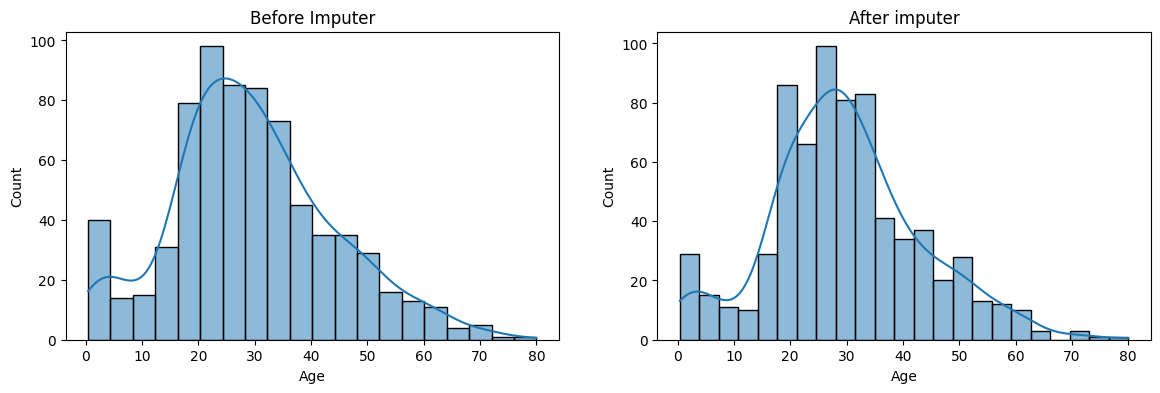

In [60]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sns.histplot(df['Age'],kde=True)
plt.title('Before Imputer')

plt.subplot(1,2,2)
sns.histplot(X_train_trf['Age'],kde=True)
plt.title('After imputer')
plt.show()


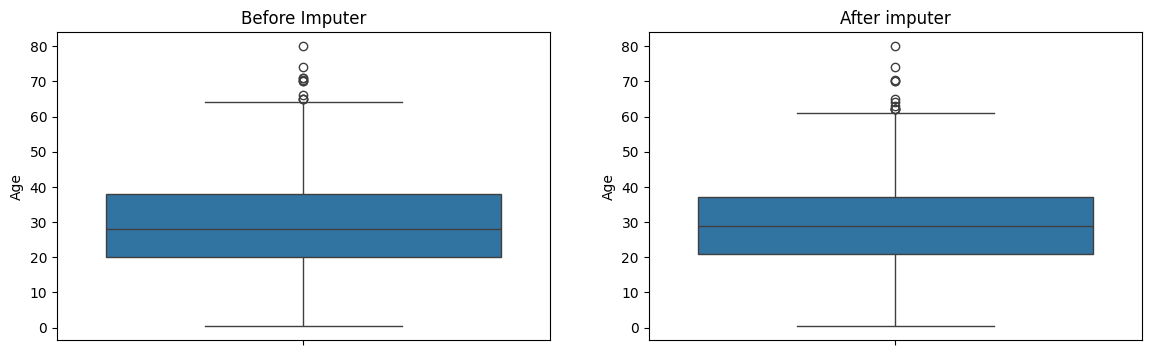

In [61]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sns.boxplot(df['Age'])
plt.title('Before Imputer')

plt.subplot(1,2,2)
sns.boxplot(X_train_trf['Age'])
plt.title('After imputer')
plt.show()

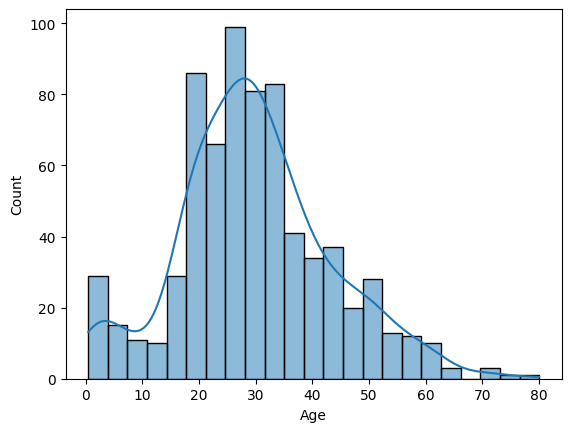

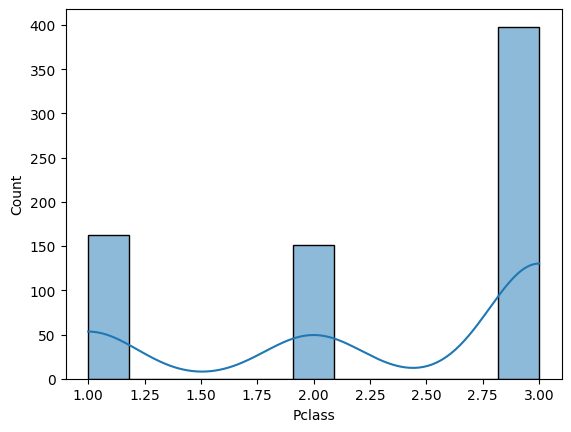

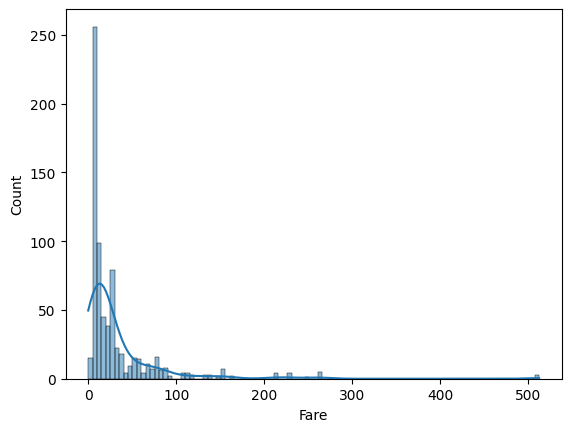

In [62]:
for i in X_train_trf:
    sns.histplot(data=X_train_trf,x=i,kde=True)
    plt.show()

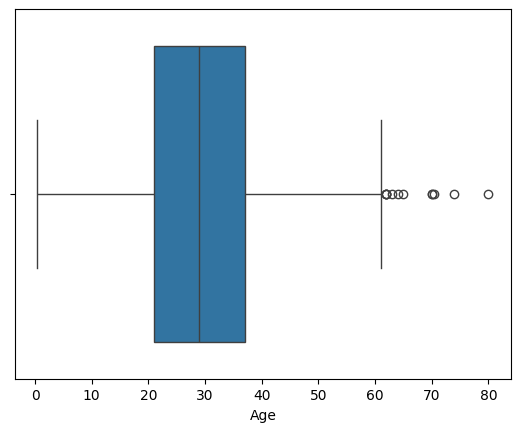

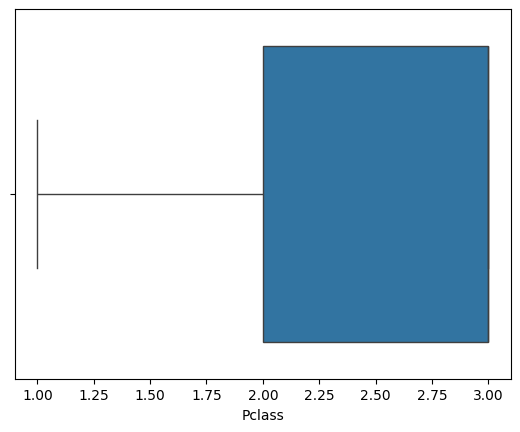

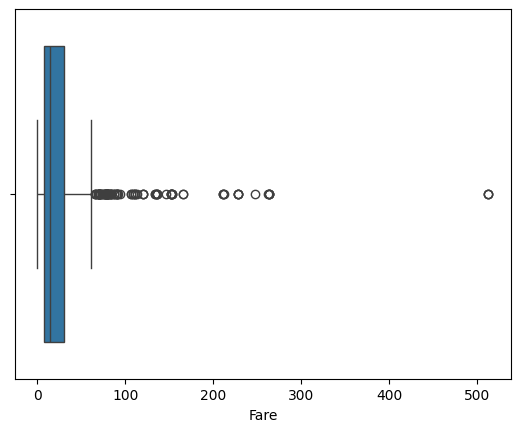

In [63]:
for i in X_train_trf:
    sns.boxplot(data=X_train_trf,x=i)
    plt.show()

In [64]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train_trf,y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [65]:
X_test_trf=pd.DataFrame(data=X_test_trf,columns=X_train.columns)

In [66]:
y_pred=model.predict(X_test_trf)
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)

In [67]:
accuracy

0.7374301675977654